# Lecture 6c - Calculating Power

## Example - UI/UX Performance Evaluation Revisited

Let's look more closely at the things we've been calculating.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

plt.rcParams['figure.figsize'] = [15, 10]

# cannot observe these parameters directly in practice
p_control = 0.05
p_test = 0.06

# number of users in each group
n_control = 200        # control group
n_test = 200           # test group

# generate control group
np.random.seed(1)

obs_control = np.random.binomial(1, p = p_control, size = n_control)

p_control_hat = np.sum(obs_control)/n_control

# generate test group
np.random.seed(1)

obs_test = np.random.binomial(1, p = p_test, size = n_test)

p_test_hat = np.sum(obs_test)/n_test

print('Observed p for control group:', p_control_hat)
print('Observed p for test group:', p_test_hat)

Observed p for control group: 0.045
Observed p for test group: 0.06


Let's calculate the sampling distributions for both hypotheses.

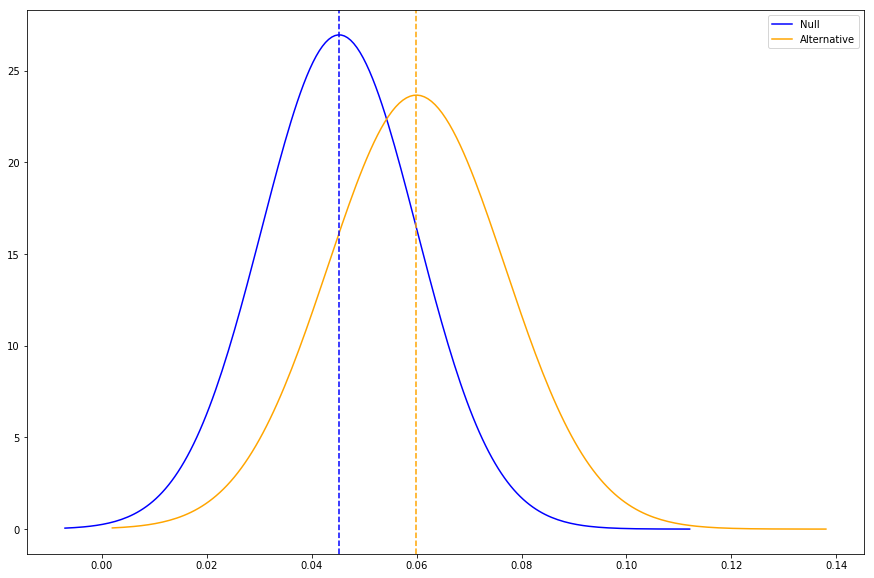

In [14]:
sim_size = 10000

p_control_vec = []
p_test_vec = []
for i in range(sim_size):
    
    # bootstrap
    obs_control_bootstrap = np.random.choice(obs_control, size = n_control, replace = True)
    obs_test_bootstrap = np.random.choice(obs_test, size = n_test, replace = True)
    
    # store estimates
    p_control_vec.append(np.sum(obs_control_bootstrap)/n_control)
    p_test_vec.append(np.sum(obs_test_bootstrap)/n_test)
     
ax = sns.distplot(p_control_vec, hist = False, kde = False, fit = norm, fit_kws = {'color': 'blue'})
ax = sns.distplot(p_test_vec, hist = False, kde = False, fit = norm, fit_kws = {'color': 'orange'})
plt.axvline(np.mean(p_control_vec), c = 'blue', linestyle = 'dashed')
plt.axvline(np.mean(p_test_vec), c = 'orange', linestyle = 'dashed')
plt.legend(['Null', 'Alternative'])
plt.show()

Recall the definition of power: <b>the probability that we reject $H_0$ given that $H_0$ is false</b>.

In other words it is <b>the probability that we reject $H_0$ given that $H_1$ is true</b>.

When do we reject $H_0$? If it doesn't meet our $\alpha$ threshold.

In [17]:
alpha = 0.50

z_crit = norm.ppf(1 - alpha)
print('Critical Z-Value:', z_crit)

sigma = np.sqrt(p_control_hat*(1-p_control_hat)/n_control)
crit = z_crit*sigma + p_control_hat
print('Critical Value:', crit)

Critical Z-Value: 0.0
Critical Value: 0.045


Power: 0.7671


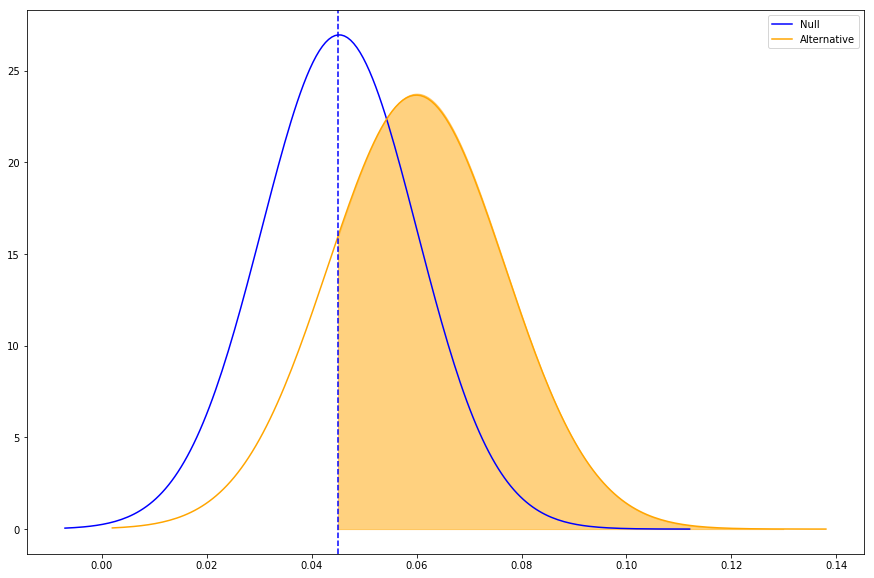

In [18]:
power =  np.sum(np.array(p_test_vec) > crit)/sim_size
print('Power:', power)

ax = sns.distplot(p_control_vec, hist = False, kde = False, fit = norm, fit_kws = {'color': 'blue'})
ax = sns.distplot(p_test_vec, hist = False, kde = False, fit = norm, fit_kws = {'color': 'orange'})
plt.legend(['Null', 'Alternative'])

plt.axvline(crit, c = 'blue', linestyle = 'dashed')
alt = norm(p_test_hat, np.sqrt(p_test_hat*(1-p_test_hat)/n_test))
x_shade = np.arange(crit, max(p_test_vec), 0.0001)
plt.fill_between(x_shade, alt.pdf(x_shade), color = 'orange', alpha = 0.5)

plt.show()